In [5]:
from utils import *

## Modèle Logistique

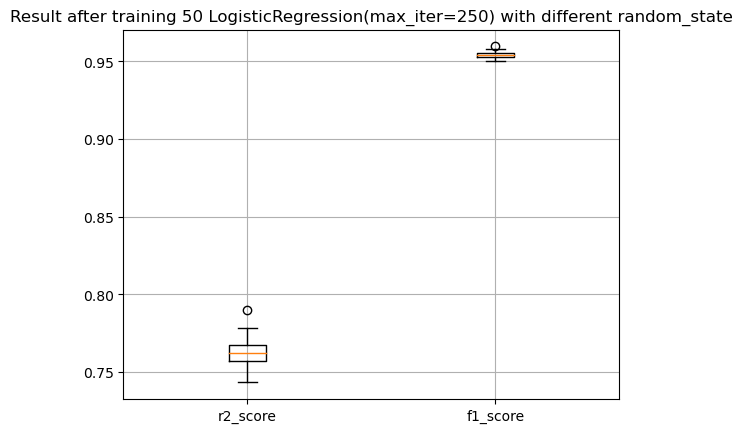

In [2]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=250)
value = multi_test(logistic_model,n=50,random_start=420,test_size=0.25)

Grid Search Progress: 100%|██████████| 72/72 [21:43<00:00, 18.11s/it]


LogisticRegression(C=10, max_iter=500, tol=1e-05)


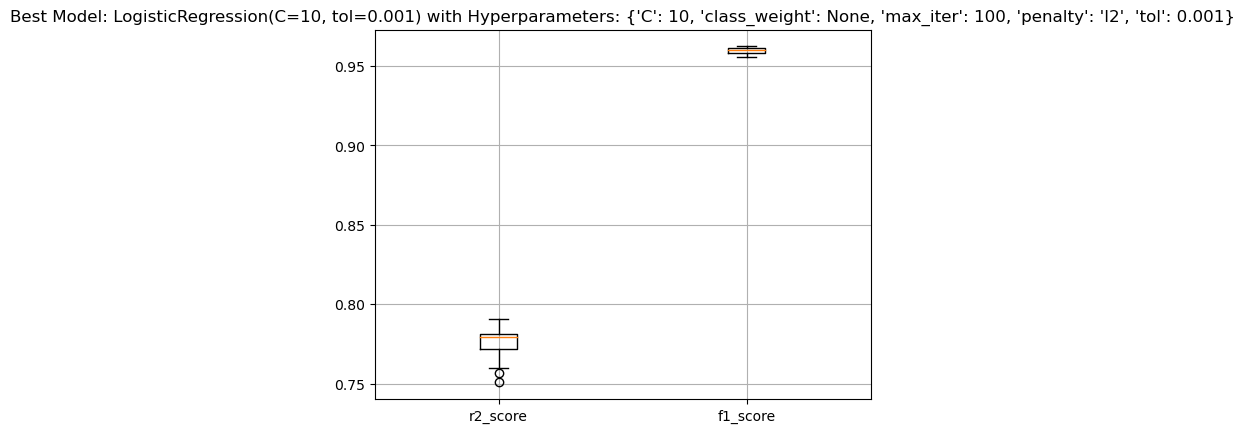

Best hyperparameters: {'C': 10, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'tol': 0.001}
Best score (f1_score): 0.9593612235716923


In [2]:
import warnings
warnings.filterwarnings("ignore")

hyperparameters = {
    "penalty": [ "l2"],
    'C': [0.01, 0.1, 1, 10],
    'class_weight': ['balanced', None],
    'max_iter': [100,250,500],
    'tol': [1e-3,1e-4, 1e-5],
    "n_jobs":[6],
}

logistic_model = LogisticRegression()

best_model, best_params, best_score, all_results = grid_search(
    logistic_model, X_np_train, Y_np_train, hyperparameters, n=25, random_start= 42,
    saving_path="Archives_Model/Logistic_Regression/grid_best_model.joblib" ,display_boxplot=True)

In [3]:
logistic_model = LogisticRegression(max_iter=250)
test = submission(logistic_model,name_file="logistic_soumission.csv")

### K_Neighbors Classifier

Grid Search Progress: 100%|██████████| 96/96 [53:18<00:00, 33.32s/it]


KNeighborsClassifier(leaf_size=40, n_jobs=16, n_neighbors=60, p=3,
                     weights='distance')


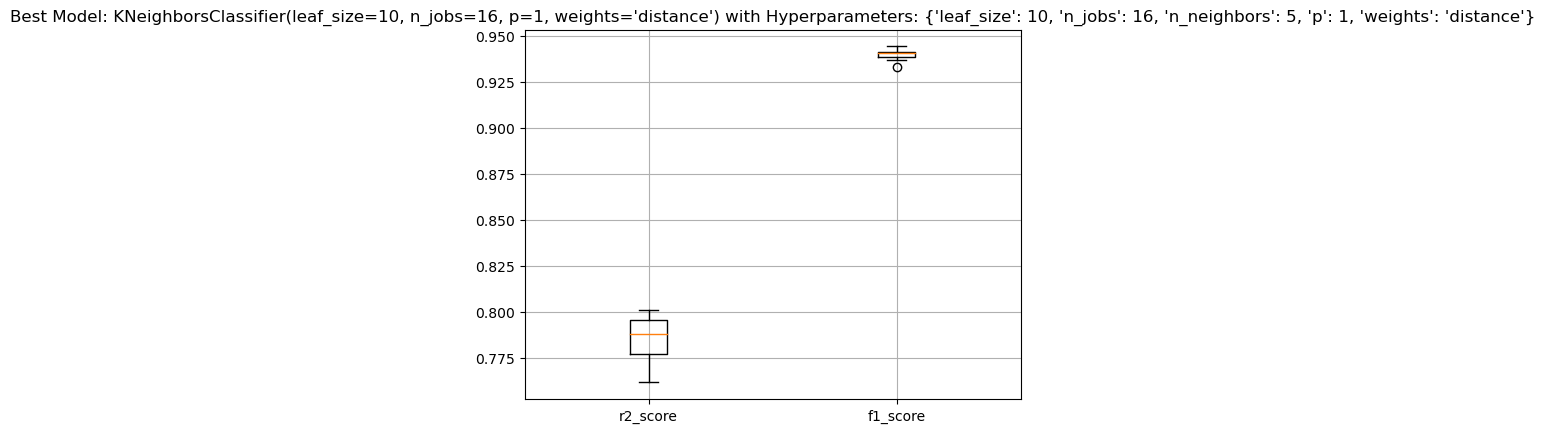

Best hyperparameters: {'leaf_size': 10, 'n_jobs': 16, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best score (f1_score): 0.9399259268691673


In [2]:
from sklearn.neighbors import KNeighborsClassifier

hyperparameters = {
    "weights": [ "uniform",'distance'],
    'p': [ 1,2,3],
    'n_neighbors': [5,15,30,60],
    'leaf_size': [10,20,30,40],
    "n_jobs" : [nb_cpu]
}

neighbor_model = KNeighborsClassifier()

best_model, best_params, best_score, all_results = grid_search(
    neighbor_model, X_np_train, Y_np_train, hyperparameters, n=25, random_start= 42,
    saving_path="Archives_Model/KNeighbors_Classifier/grid_best_model.joblib" ,display_boxplot=True)

In [4]:
loaded_model = joblib.load("Archives_Model/KNeighbors_Classifier/grid_best_model.joblib")
loaded_model

KNeighborsClassifier(leaf_size=10, n_jobs=16, p=1, weights='distance')

### Random Forest Classifier

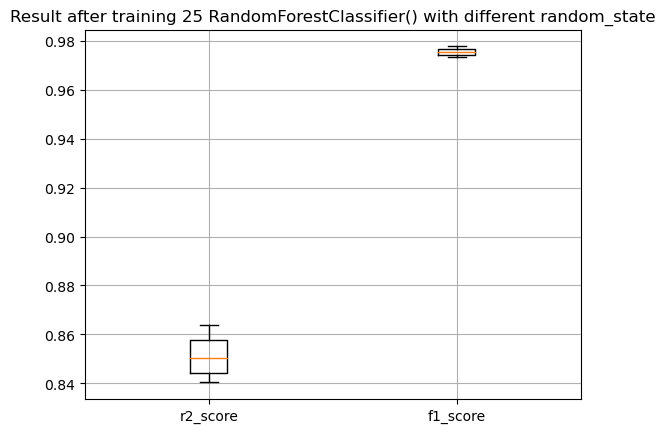

In [4]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier()
value = multi_test(forest_model,n=25,random_start=420,test_size=0.25)

In [7]:
forest_model = RandomForestClassifier(n_estimators=500)
test = submission(forest_model,name_file="forest_soumission.csv")

Grid Search Progress: 100%|██████████| 15/15 [2:02:45<00:00, 491.00s/it]  


RandomForestClassifier(criterion='log_loss', n_estimators=800, n_jobs=6)


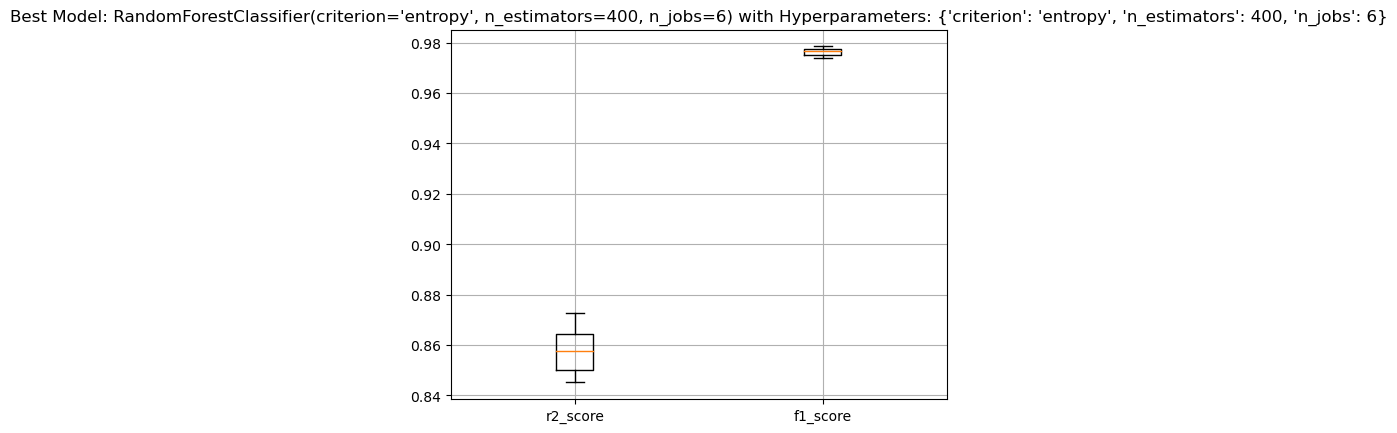

Best hyperparameters: {'criterion': 'entropy', 'n_estimators': 400, 'n_jobs': 6}
Best score (f1_score): 0.9765180064159114


In [8]:
from sklearn.ensemble import RandomForestClassifier
hyperparameters = {
    "criterion": [ "gini",'entropy','log_loss'],
    'n_estimators': [50, 100,200,400,800],
    #'max_depth': [20,50,100,200,400],
    "n_jobs":[nb_cpu],
}

forest_model = RandomForestClassifier()

best_model, best_params, best_score, all_results = grid_search(
    forest_model, X_np_train, Y_np_train, hyperparameters, n=25, random_start= 42,
    saving_path="Archives_Model/Random_Forest/grid_best_model.joblib" ,display_boxplot=True)

### Boosting 

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

random_seed = 42
param_grid = {
    "loss": [ 'log_loss',"deviance"],
    'learning_rate': [ 0.1],#, 0.2],
    'n_estimators': [250],
    'criterion':["friedman_mse",'squared_error'],
    'max_depth': [50,100,200,400],
    "n_iter_no_change" : [15]
}

boosting_classif_model = GradientBoostingClassifier()

grid_search = GridSearchCV(estimator=boosting_classif_model, param_grid=param_grid, scoring='r2',verbose=1,n_jobs=nb_cpu//2)

grid_search.fit(X_np_train, Y_np_train)
best_params_boost = grid_search.best_params_
best_model_boost = grid_search.best_estimator_

save_model(best_model_boost,path_to_save="Archives_Model/Boosting_Classificator/scikit_GDCV_best_model")

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [10]:
best_params_boost

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 200,
 'n_estimators': 250,
 'n_iter_no_change': 15}

In [9]:
best_model_boost

GradientBoostingClassifier(loss='deviance', max_depth=200, n_estimators=250,
                           n_iter_no_change=15)

Grid Search Progress: 100%|██████████| 48/48 [1:21:11<00:00, 101.50s/it]


GradientBoostingClassifier(criterion='squared_error', loss='deviance',
                           max_depth=400, n_estimators=500,
                           n_iter_no_change=15)


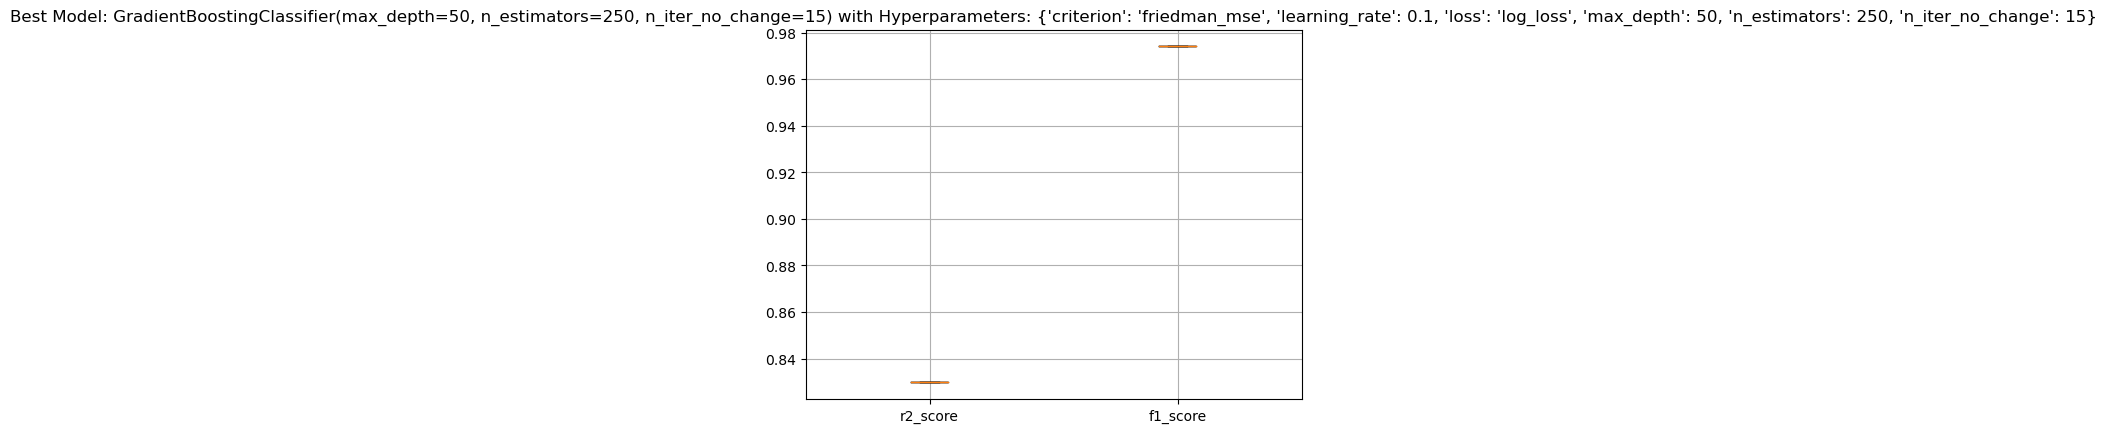

Best hyperparameters: {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 50, 'n_estimators': 250, 'n_iter_no_change': 15}
Best score (f1_score): 0.9741025556454883


In [6]:
from sklearn.ensemble import GradientBoostingClassifier

hyperparameters = {
    "loss": [ 'log_loss',"deviance"],
    'learning_rate': [0.1],
    'n_estimators': [100,250,500],
    'criterion':["friedman_mse",'squared_error'],
    'max_depth': [50,100,200,400],
    "n_iter_no_change" : [15],
    "random_state": [42], #control the randomness for each boosting
}

boosting_model = GradientBoostingClassifier()

best_model, best_params, best_score, all_results = grid_search(
    boosting_model, X_np_train, Y_np_train, hyperparameters, n=1, random_start= 42,
    saving_path="Archives_Model/Boosting_Classification/grid_best_model.joblib" ,display_boxplot=True)